## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.517487  0.249957  1.707946 -1.447210  1.499354  0.989187
1  1.327889 -1.228940 -0.746504 -0.252100 -0.350970 -0.734877
2 -1.639852  0.047473  1.272887 -1.697252 -0.063596 -1.857610
3  0.400077 -1.300491 -1.459454 -0.175726  1.137920  0.067570
4 -0.361962  0.273111  0.874037 -0.048224 -1.707774 -0.387938


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9747409	total: 58ms	remaining: 57.9s
1:	learn: 0.9657124	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9562722	total: 59.3ms	remaining: 19.7s
3:	learn: 0.9467463	total: 59.9ms	remaining: 14.9s
4:	learn: 0.9379810	total: 60.5ms	remaining: 12s
5:	learn: 0.9304938	total: 61.2ms	remaining: 10.1s
6:	learn: 0.9201774	total: 61.7ms	remaining: 8.75s
7:	learn: 0.9117163	total: 62.3ms	remaining: 7.73s
8:	learn: 0.9044505	total: 62.8ms	remaining: 6.92s
9:	learn: 0.8953961	total: 63.5ms	remaining: 6.29s
10:	learn: 0.8878646	total: 64ms	remaining: 5.75s
11:	learn: 0.8785038	total: 64.6ms	remaining: 5.32s
12:	learn: 0.8693213	total: 65.1ms	remaining: 4.94s
13:	learn: 0.8605554	total: 65.6ms	remaining: 4.62s
14:	learn: 0.8534503	total: 66ms	remaining: 4.33s
15:	learn: 0.8462494	total: 66.4ms	remaining: 4.08s
16:	learn: 0.8390394	total: 66.8ms	remaining: 3.86s
17:	learn: 0.8317247	total: 67.3ms	remaining: 3.67s
18:	learn: 0.8244565	total: 67.7ms	remaining: 3.49s


110:	learn: 0.3943065	total: 110ms	remaining: 880ms
111:	learn: 0.3917429	total: 110ms	remaining: 876ms
112:	learn: 0.3890669	total: 111ms	remaining: 870ms
113:	learn: 0.3857918	total: 111ms	remaining: 865ms
114:	learn: 0.3833027	total: 112ms	remaining: 860ms
115:	learn: 0.3806166	total: 113ms	remaining: 861ms
116:	learn: 0.3779086	total: 113ms	remaining: 856ms
117:	learn: 0.3750848	total: 114ms	remaining: 851ms
118:	learn: 0.3725473	total: 114ms	remaining: 846ms
119:	learn: 0.3706617	total: 115ms	remaining: 841ms
120:	learn: 0.3671137	total: 115ms	remaining: 837ms
121:	learn: 0.3644218	total: 116ms	remaining: 832ms
122:	learn: 0.3619688	total: 116ms	remaining: 828ms
123:	learn: 0.3595779	total: 117ms	remaining: 823ms
124:	learn: 0.3571252	total: 117ms	remaining: 819ms
125:	learn: 0.3546661	total: 117ms	remaining: 815ms
126:	learn: 0.3521052	total: 118ms	remaining: 810ms
127:	learn: 0.3494213	total: 118ms	remaining: 807ms
128:	learn: 0.3465612	total: 119ms	remaining: 803ms
129:	learn: 

271:	learn: 0.1304334	total: 187ms	remaining: 501ms
272:	learn: 0.1294378	total: 188ms	remaining: 500ms
273:	learn: 0.1284151	total: 188ms	remaining: 498ms
274:	learn: 0.1275278	total: 189ms	remaining: 497ms
275:	learn: 0.1266505	total: 189ms	remaining: 496ms
276:	learn: 0.1261112	total: 189ms	remaining: 494ms
277:	learn: 0.1254023	total: 190ms	remaining: 493ms
278:	learn: 0.1244432	total: 190ms	remaining: 492ms
279:	learn: 0.1234917	total: 191ms	remaining: 490ms
280:	learn: 0.1225248	total: 191ms	remaining: 489ms
281:	learn: 0.1215359	total: 191ms	remaining: 487ms
282:	learn: 0.1209924	total: 192ms	remaining: 486ms
283:	learn: 0.1204995	total: 192ms	remaining: 485ms
284:	learn: 0.1196688	total: 193ms	remaining: 484ms
285:	learn: 0.1188689	total: 194ms	remaining: 483ms
286:	learn: 0.1183460	total: 194ms	remaining: 482ms
287:	learn: 0.1174094	total: 195ms	remaining: 481ms
288:	learn: 0.1166038	total: 195ms	remaining: 480ms
289:	learn: 0.1159919	total: 195ms	remaining: 478ms
290:	learn: 

500:	learn: 0.0402075	total: 293ms	remaining: 292ms
501:	learn: 0.0400293	total: 294ms	remaining: 292ms
502:	learn: 0.0398199	total: 294ms	remaining: 291ms
503:	learn: 0.0396097	total: 295ms	remaining: 290ms
504:	learn: 0.0393996	total: 295ms	remaining: 289ms
505:	learn: 0.0392318	total: 295ms	remaining: 288ms
506:	learn: 0.0390310	total: 296ms	remaining: 288ms
507:	learn: 0.0388274	total: 296ms	remaining: 287ms
508:	learn: 0.0386285	total: 297ms	remaining: 286ms
509:	learn: 0.0384357	total: 297ms	remaining: 286ms
510:	learn: 0.0382068	total: 298ms	remaining: 285ms
511:	learn: 0.0380089	total: 298ms	remaining: 284ms
512:	learn: 0.0378553	total: 299ms	remaining: 284ms
513:	learn: 0.0376335	total: 299ms	remaining: 283ms
514:	learn: 0.0375174	total: 300ms	remaining: 282ms
515:	learn: 0.0373259	total: 300ms	remaining: 281ms
516:	learn: 0.0371513	total: 301ms	remaining: 281ms
517:	learn: 0.0369643	total: 301ms	remaining: 280ms
518:	learn: 0.0367723	total: 302ms	remaining: 279ms
519:	learn: 

664:	learn: 0.0203356	total: 370ms	remaining: 186ms
665:	learn: 0.0202359	total: 371ms	remaining: 186ms
666:	learn: 0.0202125	total: 371ms	remaining: 185ms
667:	learn: 0.0201446	total: 372ms	remaining: 185ms
668:	learn: 0.0201209	total: 372ms	remaining: 184ms
669:	learn: 0.0200234	total: 372ms	remaining: 183ms
670:	learn: 0.0199753	total: 373ms	remaining: 183ms
671:	learn: 0.0199286	total: 373ms	remaining: 182ms
672:	learn: 0.0198334	total: 374ms	remaining: 182ms
673:	learn: 0.0198102	total: 374ms	remaining: 181ms
674:	learn: 0.0197446	total: 375ms	remaining: 180ms
675:	learn: 0.0196996	total: 375ms	remaining: 180ms
676:	learn: 0.0196236	total: 376ms	remaining: 179ms
677:	learn: 0.0195632	total: 376ms	remaining: 179ms
678:	learn: 0.0195453	total: 377ms	remaining: 178ms
679:	learn: 0.0194539	total: 377ms	remaining: 177ms
680:	learn: 0.0194363	total: 377ms	remaining: 177ms
681:	learn: 0.0194095	total: 378ms	remaining: 176ms
682:	learn: 0.0193363	total: 378ms	remaining: 176ms
683:	learn: 

893:	learn: 0.0097953	total: 477ms	remaining: 56.6ms
894:	learn: 0.0097599	total: 478ms	remaining: 56ms
895:	learn: 0.0097103	total: 478ms	remaining: 55.5ms
896:	learn: 0.0096760	total: 479ms	remaining: 55ms
897:	learn: 0.0096354	total: 479ms	remaining: 54.4ms
898:	learn: 0.0095945	total: 480ms	remaining: 53.9ms
899:	learn: 0.0095516	total: 480ms	remaining: 53.3ms
900:	learn: 0.0095097	total: 480ms	remaining: 52.8ms
901:	learn: 0.0094721	total: 481ms	remaining: 52.3ms
902:	learn: 0.0094327	total: 482ms	remaining: 51.7ms
903:	learn: 0.0094000	total: 482ms	remaining: 51.2ms
904:	learn: 0.0093529	total: 482ms	remaining: 50.6ms
905:	learn: 0.0093173	total: 483ms	remaining: 50.1ms
906:	learn: 0.0092829	total: 483ms	remaining: 49.6ms
907:	learn: 0.0092554	total: 484ms	remaining: 49ms
908:	learn: 0.0092344	total: 484ms	remaining: 48.5ms
909:	learn: 0.0092104	total: 485ms	remaining: 47.9ms
910:	learn: 0.0092004	total: 485ms	remaining: 47.4ms
911:	learn: 0.0091816	total: 486ms	remaining: 46.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

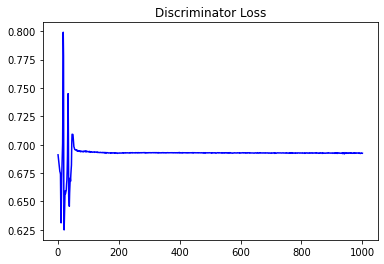

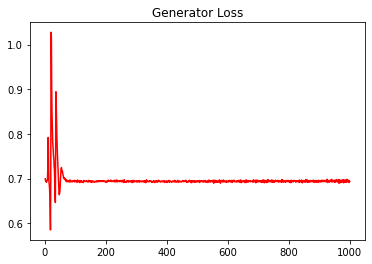

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1262722128491598


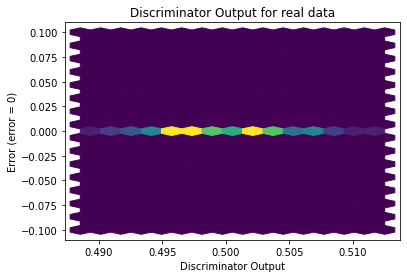

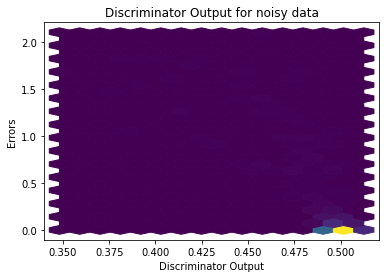

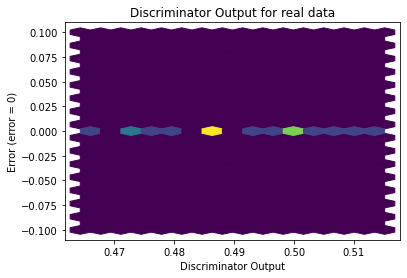

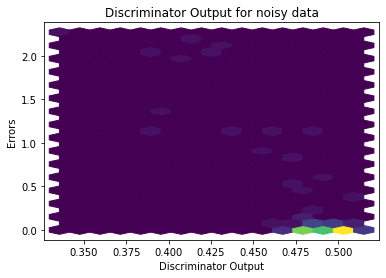

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


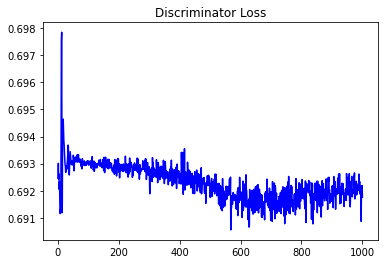

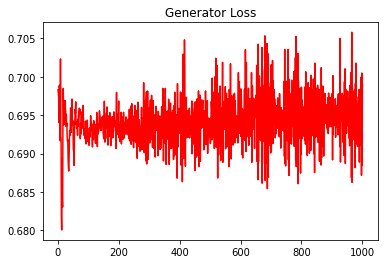

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13492664165441873


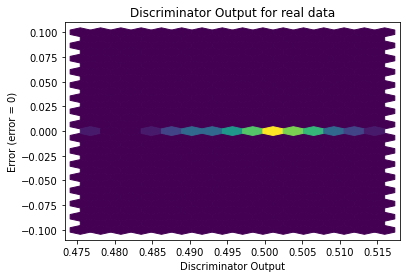

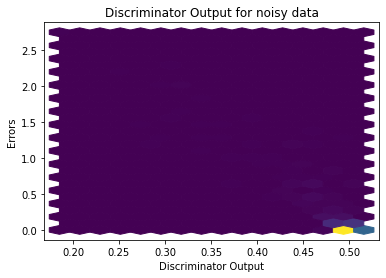

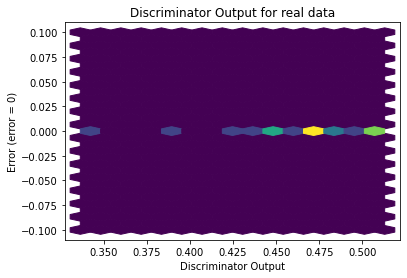

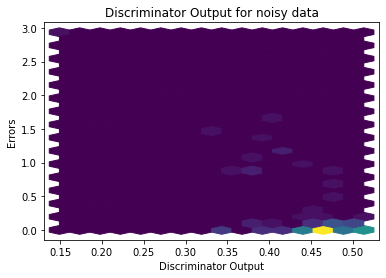

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0664]], requires_grad=True)
